<a href="https://colab.research.google.com/github/alamwasim/microstructure-alignment/blob/template-matching/microstructure_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import urllib.request

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
PATH_OF_DATA= """/content/gdrive/'My Drive'/'ML microstructure alignment'/"""
!ls {PATH_OF_DATA}

26.jpg	27.jpg


In [4]:
!cp '/content/gdrive/My Drive/ML microstructure alignment/26.jpg' "26.jpg"
!cp '/content/gdrive/My Drive/ML microstructure alignment/27.jpg' "27.jpg"

In [5]:
img26 = cv2.imread('26.jpg',0)
img27 = cv2.imread('27.jpg',0)

In [6]:
img26.shape, img27.shape

((1536, 2048), (1536, 2048))

In [ ]:
cv2_imshow(img26)

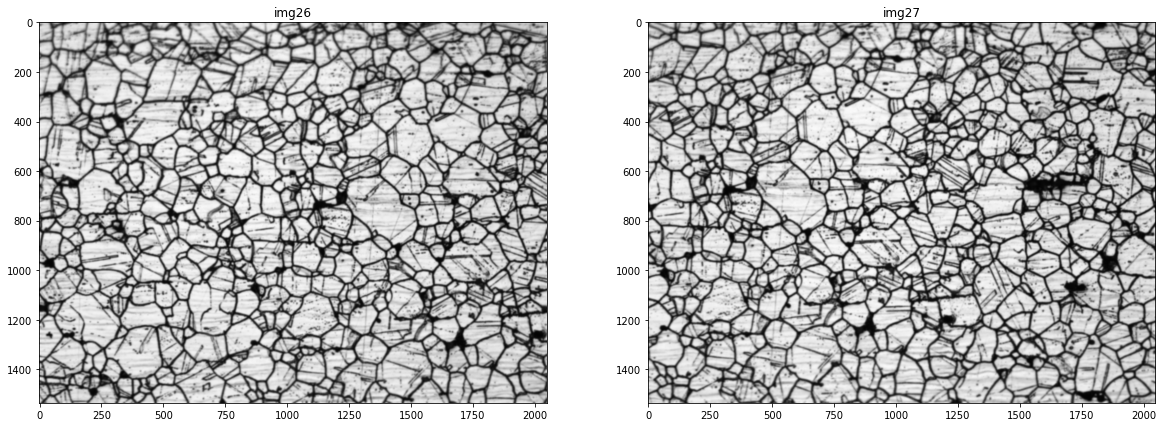

In [ ]:
# Show the image with cv2_imshow
# cv2_imshow(img26)
#Show the image with matplotlib
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
fig, (ax1, ax2,) = plt.subplots(figsize=(20, 20), ncols=2)
ax1.imshow(img26, cmap = 'gray', interpolation = 'bicubic')
ax2.imshow(img27, cmap = 'gray', interpolation = 'bicubic')
ax1.title.set_text('img26')
ax2.title.set_text('img27')
plt.show()

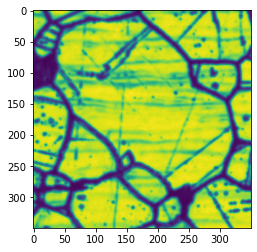

In [ ]:
ax,ay=400,550
a=img27[ay:ay+350,ax:ax+350]
plt.imshow(a)

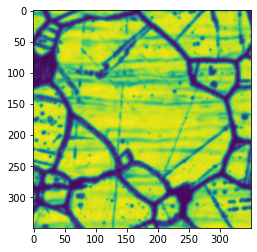

In [ ]:
bx,by=1205,613
b=img26[by:by+350,bx:bx+350]
plt.imshow(b)

cv2.TM_CCOEFF
(1203, 611) (1553, 961)


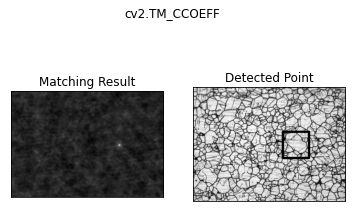

cv2.TM_CCOEFF_NORMED
(1203, 611) (1553, 961)


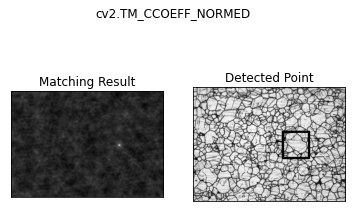

cv2.TM_CCORR
(1203, 611) (1553, 961)


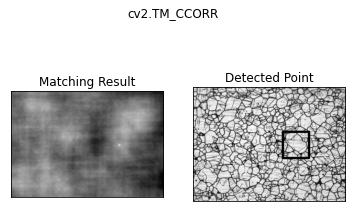

cv2.TM_CCORR_NORMED
(1203, 611) (1553, 961)


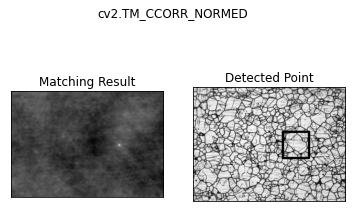

cv2.TM_SQDIFF
(1203, 611) (1553, 961)


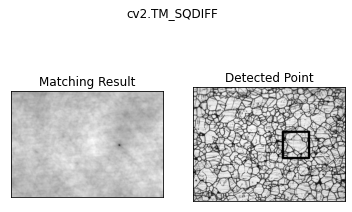

cv2.TM_SQDIFF_NORMED
(1203, 611) (1553, 961)


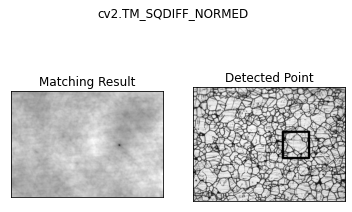

In [ ]:
img = img26.copy()
img2 = img.copy()
template = a
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    print(meth)
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print(top_left,bottom_right)

    cv2.rectangle( img,top_left, bottom_right, 0, 30)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [ ]:
print("selective cropped coordinate in img27",(ax,ay),".Selective cropped Matched coordinate in  img26",top_left )
dx,dy=top_left[0]-ax,top_left[1]-ay
print("img26-img27 distance","dx:",dx,"dy:",dy)

selective cropped coordinate in img27 (400, 550) .Selective cropped Matched coordinate in  img26 (1203, 611)
img26-img27 distance dx: 803 dy: 61


In [13]:
def template_matching(img, template,method):
  h, w = template.shape[::-1]
  meth = eval(method)
  img=img.copy()

  # Apply template Matching
  res = cv2.matchTemplate(img,template,meth)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  
  # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + h, top_left[1] + w)
  print("top_left and bottom_right",top_left,bottom_right)
  print("min_val and max_val",min_val,max_val)
  
  cv2.rectangle( img,top_left, bottom_right, 0, int(img.shape[0]*0.01))
  
  plt.subplot(141),plt.imshow(template,cmap = 'gray')
  plt.title('Template'), plt.xticks([]), plt.yticks([])
  plt.subplot(142),plt.imshow(img,cmap = 'gray')
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.subplot(143),plt.imshow(img[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h],cmap = 'gray')
  plt.title('Detected Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(144),plt.imshow(res,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.show()
  return top_left,min_val,max_val

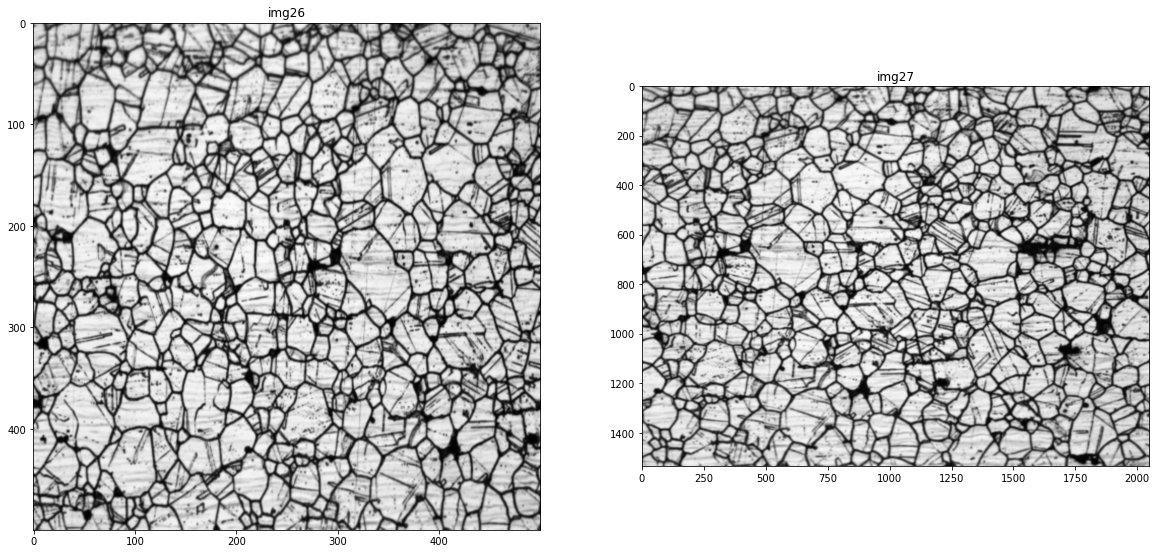

In [15]:
# Show the image with cv2_imshow
# cv2_imshow(img26)
#Show the image with matplotlib
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
fig, (ax1, ax2,) = plt.subplots(figsize=(20, 20), ncols=2)
ax1.imshow(cv2.resize(img26,(500,500)), cmap = 'gray', interpolation = 'bicubic')
ax2.imshow(img27, cmap = 'gray', interpolation = 'bicubic')
ax1.title.set_text('img26')
ax2.title.set_text('img27')
plt.show()

******************** Kernel Centre Point (50, 50) Kernel top left corner  [0, 0] ********************


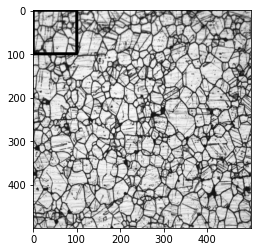

top_left and bottom_right (185, 187) (285, 287)
min_val and max_val -0.2520502805709839 0.2976377606391907


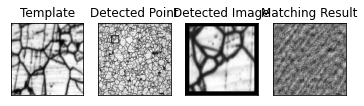

******************** Kernel Centre Point (50, 150) Kernel top left corner  [0, 100] ********************


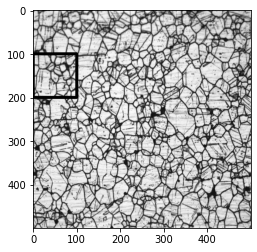

top_left and bottom_right (883, 317) (983, 417)
min_val and max_val -0.22320277988910675 0.22949692606925964


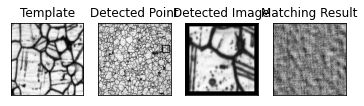

******************** Kernel Centre Point (50, 250) Kernel top left corner  [0, 200] ********************


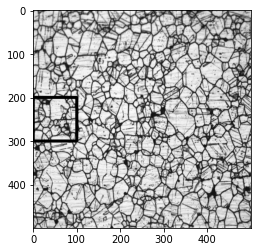

top_left and bottom_right (84, 556) (184, 656)
min_val and max_val -0.20980876684188843 0.23988445103168488


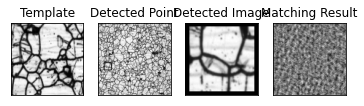

******************** Kernel Centre Point (50, 350) Kernel top left corner  [0, 300] ********************


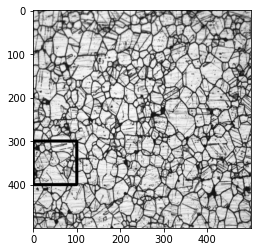

top_left and bottom_right (429, 805) (529, 905)
min_val and max_val -0.20638541877269745 0.2657148838043213


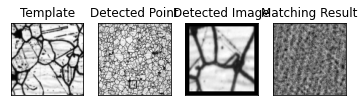

******************** Kernel Centre Point (50, 450) Kernel top left corner  [0, 400] ********************


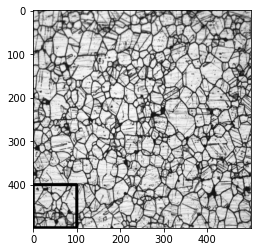

top_left and bottom_right (205, 468) (305, 567)
min_val and max_val -0.25389936566352844 0.2688330411911011


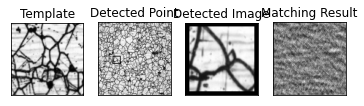

******************** Kernel Centre Point (150, 50) Kernel top left corner  [100, 0] ********************


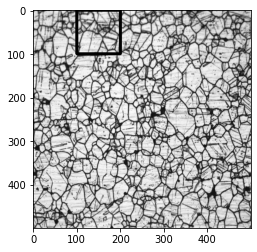

top_left and bottom_right (128, 154) (228, 254)
min_val and max_val -0.25932517647743225 0.26452895998954773


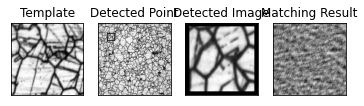

******************** Kernel Centre Point (150, 150) Kernel top left corner  [100, 100] ********************


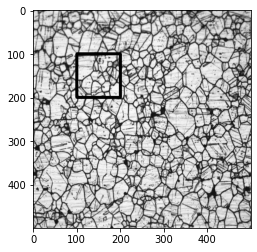

top_left and bottom_right (356, 58) (456, 158)
min_val and max_val -0.23647931218147278 0.24107329547405243


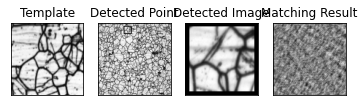

******************** Kernel Centre Point (150, 250) Kernel top left corner  [100, 200] ********************


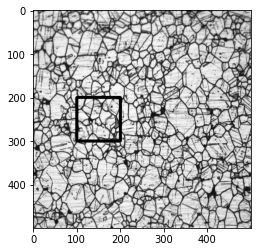

top_left and bottom_right (315, 484) (415, 584)
min_val and max_val -0.1827545315027237 0.23222927749156952


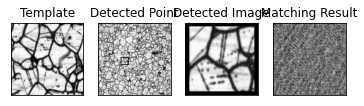

******************** Kernel Centre Point (150, 350) Kernel top left corner  [100, 300] ********************


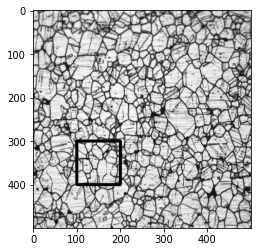

top_left and bottom_right (125, 20) (225, 120)
min_val and max_val -0.2021111696958542 0.27082374691963196


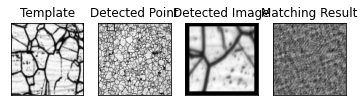

******************** Kernel Centre Point (150, 450) Kernel top left corner  [100, 400] ********************


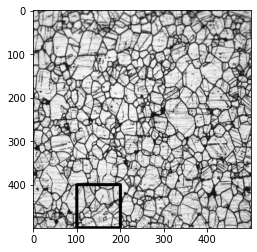

top_left and bottom_right (126, 151) (226, 250)
min_val and max_val -0.2011258751153946 0.26553401350975037


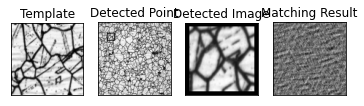

******************** Kernel Centre Point (250, 50) Kernel top left corner  [200, 0] ********************


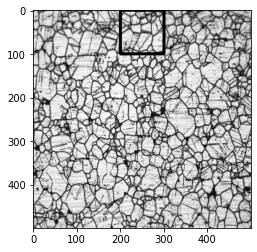

top_left and bottom_right (40, 809) (140, 909)
min_val and max_val -0.21628277003765106 0.24215559661388397


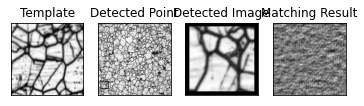

******************** Kernel Centre Point (250, 150) Kernel top left corner  [200, 100] ********************


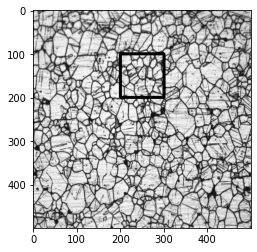

top_left and bottom_right (342, 145) (442, 245)
min_val and max_val -0.19214454293251038 0.20699277520179749


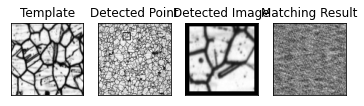

******************** Kernel Centre Point (250, 250) Kernel top left corner  [200, 200] ********************


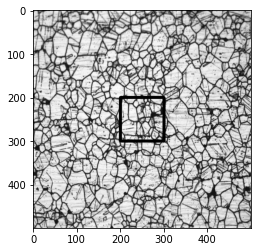

top_left and bottom_right (759, 120) (859, 220)
min_val and max_val -0.21952137351036072 0.2563942074775696


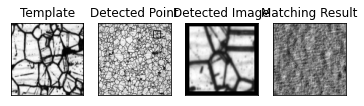

******************** Kernel Centre Point (250, 350) Kernel top left corner  [200, 300] ********************


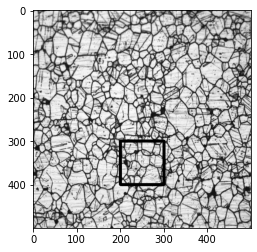

top_left and bottom_right (344, 628) (444, 728)
min_val and max_val -0.2106582671403885 0.23939043283462524


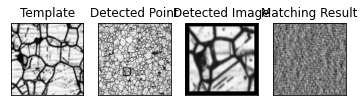

******************** Kernel Centre Point (250, 450) Kernel top left corner  [200, 400] ********************


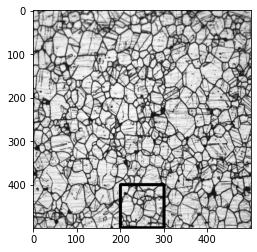

top_left and bottom_right (90, 596) (190, 695)
min_val and max_val -0.24182096123695374 0.22058972716331482


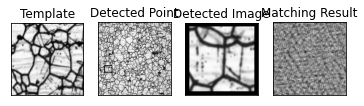

******************** Kernel Centre Point (350, 50) Kernel top left corner  [300, 0] ********************


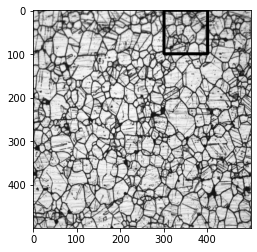

top_left and bottom_right (302, 884) (402, 984)
min_val and max_val -0.2246553748846054 0.266444593667984


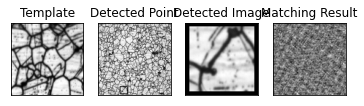

******************** Kernel Centre Point (350, 150) Kernel top left corner  [300, 100] ********************


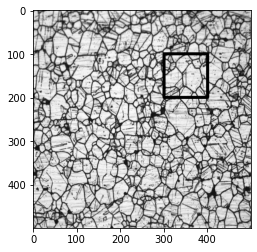

top_left and bottom_right (313, 20) (413, 120)
min_val and max_val -0.20896968245506287 0.2191259264945984


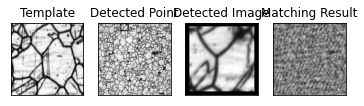

******************** Kernel Centre Point (350, 250) Kernel top left corner  [300, 200] ********************


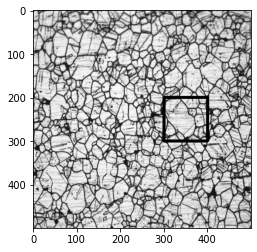

top_left and bottom_right (382, 211) (482, 311)
min_val and max_val -0.23227472603321075 0.25402742624282837


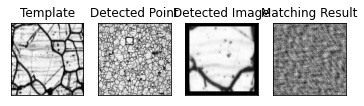

******************** Kernel Centre Point (350, 350) Kernel top left corner  [300, 300] ********************


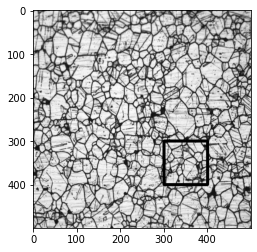

top_left and bottom_right (453, 860) (553, 960)
min_val and max_val -0.19726140797138214 0.21293623745441437


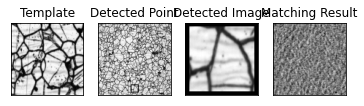

******************** Kernel Centre Point (350, 450) Kernel top left corner  [300, 400] ********************


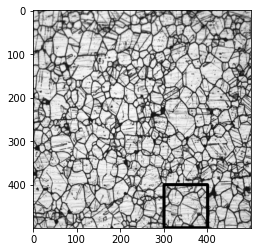

top_left and bottom_right (425, 401) (525, 500)
min_val and max_val -0.19924984872341156 0.2868041694164276


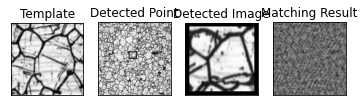

******************** Kernel Centre Point (450, 50) Kernel top left corner  [400, 0] ********************


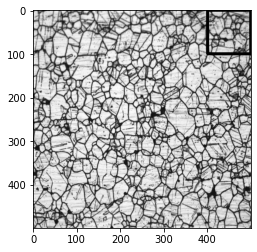

top_left and bottom_right (680, 859) (779, 959)
min_val and max_val -0.21276171505451202 0.260282963514328


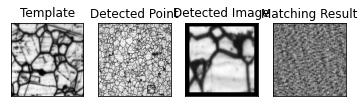

******************** Kernel Centre Point (450, 150) Kernel top left corner  [400, 100] ********************


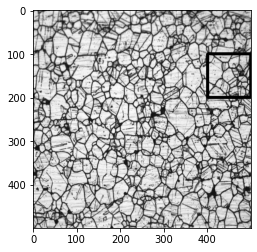

top_left and bottom_right (680, 384) (779, 484)
min_val and max_val -0.26527833938598633 0.2757100462913513


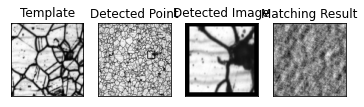

******************** Kernel Centre Point (450, 250) Kernel top left corner  [400, 200] ********************


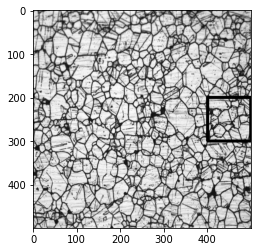

top_left and bottom_right (827, 94) (926, 194)
min_val and max_val -0.19717064499855042 0.22201913595199585


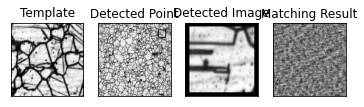

******************** Kernel Centre Point (450, 350) Kernel top left corner  [400, 300] ********************


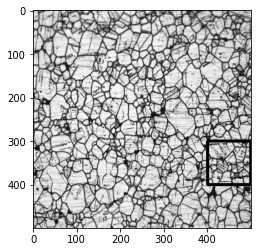

top_left and bottom_right (115, 870) (214, 970)
min_val and max_val -0.17659416794776917 0.2243572622537613


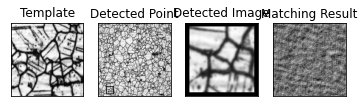

******************** Kernel Centre Point (450, 450) Kernel top left corner  [400, 400] ********************


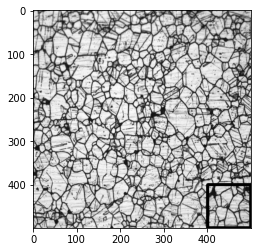

top_left and bottom_right (282, 811) (381, 910)
min_val and max_val -0.20993971824645996 0.3003147542476654


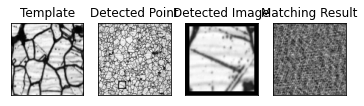



Max Value for lable got 0.3003147542476654 (450, 450, [400, 400])
dx []
dy []
Template have to be move by (nan, nan)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [23]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
kernel=100
stride=100
threshold=0.98
template_img=cv2.resize(img26,(500,500))
img=cv2.resize(img27,(1000,1000))
MAX=0
MAX_LABLE=0
dx=[]
dy=[]
for i in range(kernel//2,template_img.shape[1],stride):
  for j in range(kernel//2,template_img.shape[0],stride):
    img2=template_img.copy()
    top_left=[i-kernel//2,j-kernel//2]
    bottom_right=[top_left[0]+kernel,top_left[1]+kernel]
    if(bottom_right[0]>=template_img.shape[1]):
      bottom_right[0]=template_img.shape[1]-1
    if (bottom_right[1]>=template_img.shape[0]):
        bottom_right[1]=template_img.shape[0]-1
    print("*"*20,"Kernel Centre Point",(i,j),"Kernel top left corner ",top_left,"*"*20)
    cv2.rectangle( img2,tuple(top_left), tuple(bottom_right), 0, int(img2.shape[0]*0.01))
    plt.imshow(img2,cmap = 'gray')
    plt.show()
    template=template_img[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
    matched_top_left,min_val,max_val=template_matching(img,template,methods[1])
    if(max_val>threshold):
      dx.append(matched_top_left[0]-top_left[0])
      dy.append(matched_top_left[1]-top_left[1])

    if(max_val>MAX):
      MAX=max_val
      MAX_LABLE=(i,j,top_left)
print("\n\nMax Value for lable got",MAX,MAX_LABLE)
print("dx",dx)
print("dy",dy)
dx,dy=np.mean(dx),np.mean(dy)
print("Template have to be move by",(dx,dy))

       



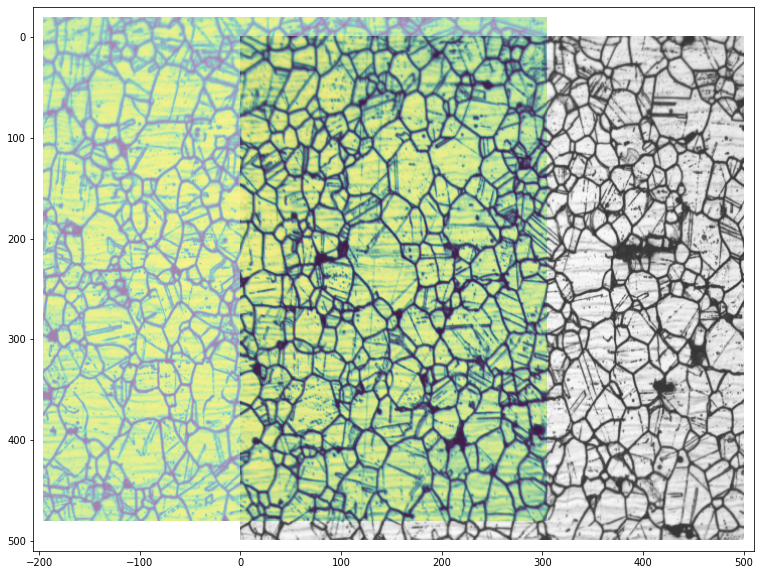

In [22]:
fig = plt.gcf()
ax = fig.gca()
ax.imshow(img,cmap='gray',alpha=0.8)
nrows,ncols=template_img.shape
ax.imshow(template_img,alpha=0.5,extent=[dx,ncols+dx,nrows+dy,dy])
ax.set_xlim(dx-10,img.shape[1]+10)
ax.set_ylim(img.shape[0]+10,dy-10)
fig.set_size_inches(15,10)

In [ ]:
 fig.savefig("aligned.png")

In [ ]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()